In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Importing the dataset
dataset = pd.read_csv('data/Mall_Customers.csv')

In [23]:
X = dataset.iloc[:,[-2,-1]]

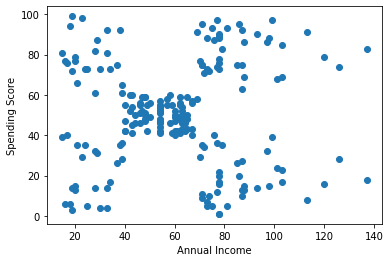

In [24]:
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

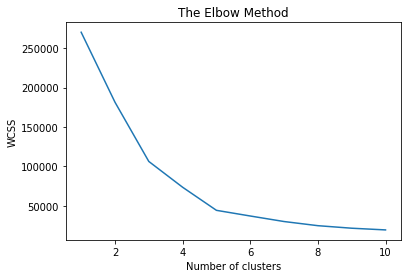

In [25]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Training the K-Means model on the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(X)

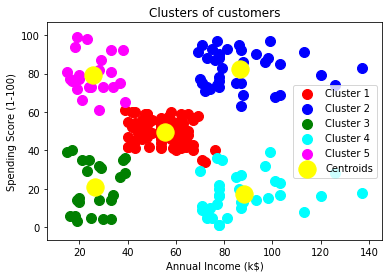

In [27]:
# Visualising the clusters
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Kmeans for the dataset with more the 2 features

In [45]:
X = dataset.iloc[:,1:]

In [46]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [47]:
X.Gender = X.Gender.map({'Male':1, 'Female':0})

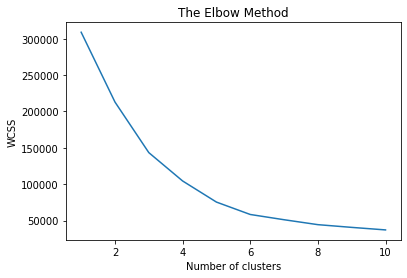

In [48]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(X)

In [50]:
X.Gender = X.Gender.map({1:'Male', 0:'Female'})

In [51]:
cluster1 = X.iloc[y_kmeans == 0,:]

In [52]:
cluster1.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,23,23.000000,23.000000,23.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,14,NaN,NaN,NaN
mean,NaN,45.217391,26.304348,20.913043
std,NaN,13.228607,7.893811,13.017167
min,NaN,19.000000,15.000000,3.000000
25%,NaN,35.500000,19.500000,9.500000
50%,NaN,46.000000,25.000000,17.000000
75%,NaN,53.500000,33.000000,33.500000


In [53]:
cluster2 = X.iloc[y_kmeans == 1,:]
cluster2.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,79,79.000000,79.000000,79.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,46,NaN,NaN,NaN
mean,NaN,43.088608,55.291139,49.569620
std,NaN,16.478572,8.710665,6.242295
min,NaN,18.000000,40.000000,35.000000
25%,NaN,27.000000,48.000000,44.500000
50%,NaN,47.000000,54.000000,50.000000
75%,NaN,54.500000,62.000000,55.000000
